In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pickle
pd.options.display.float_format = '{:.2f}'.format
from sklearn.preprocessing import FunctionTransformer

In [42]:
# Import data
data_1 = pd.read_csv('zillow_listing_cleaned.csv')

### Explore Data

In [3]:
data_1.describe(include='all')

,prices,address,zip code,beds,baths,sqft,type
count,1347.00,1347,1347,1347.00,1347.00,1347.00,1347
unique,NaN,177,32,NaN,NaN,NaN,4
top,NaN,529 SW Schubert Pl NW Calgary AB T3L 1X3,T3N,NaN,NaN,NaN,House
freq,NaN,131,265,NaN,NaN,NaN,1166
mean,532410.60,NaN,NaN,3.44,3.18,1754.90,NaN
std,243920.05,NaN,NaN,0.88,0.73,386.97,NaN
min,110000.00,NaN,NaN,1.00,1.00,433.00,NaN
25%,469900.00,NaN,NaN,3.00,3.00,1470.00,NaN
50%,539900.00,NaN,NaN,3.00,3.00,1821.00,NaN
75%,599000.00,NaN,NaN,4.00,4.00,1873.00,NaN


In [4]:
data_1['idx'] = data_1.groupby(['zip code']).ngroup()
data_1['idy'] = data_1.groupby(['type']).ngroup()
data_1

,prices,address,zip code,beds,baths,sqft,type,idx,idy
0,7900000,44 S Aspen Ridge Hts SW Calgary AB T3H 0J8,T3H,6,8,9578,House,24,2
1,2995000,548 Willow Brook Dr S Calgary AB T2J 1N7,T2J,6,6,4688,House,6,2
2,1999999,18 S Spring Glen Vw SW Calgary AB T3H 6A1,T3H,6,6,4438,House,24,2
3,1749000,85 N Slopes Poin SW Calgary AB T3H 3Y8,T3H,4,3,2533,House,24,2
4,1675000,2027 N 49th Ave SW Calgary AB T2T 2V5,T2T,5,4,2631,House,14,2
...,...,...,...,...,...,...,...,...,...
1342,212500,123 N Mount Selkirk Clos SE Calgary AB T2Z 2R5,T2Z,1,1,1851,House,18,2
1343,210000,221 N 6th Ave SE #511 Calgary AB T2G 4Z9,T2G,1,1,700,Apartment,5,0
1344,187900,2111 E 14th St SW #202 Calgary AB T2T 3T2,T2T,2,1,753,Apartment,14,0
1345,169900,6224 S 17th Ave SE #1414 Calgary AB T2A 7X8,T2A,2,1,843,Apartment,1,0


In [5]:
data_1.isnull().sum()

prices      0
address     0
zip code    0
beds        0
baths       0
sqft        0
type        0
idx         0
idy         0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prices', ylabel='Density'>

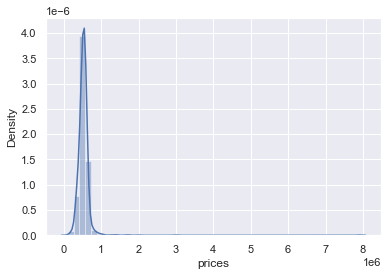

In [6]:
sns.distplot(data_1['prices'])

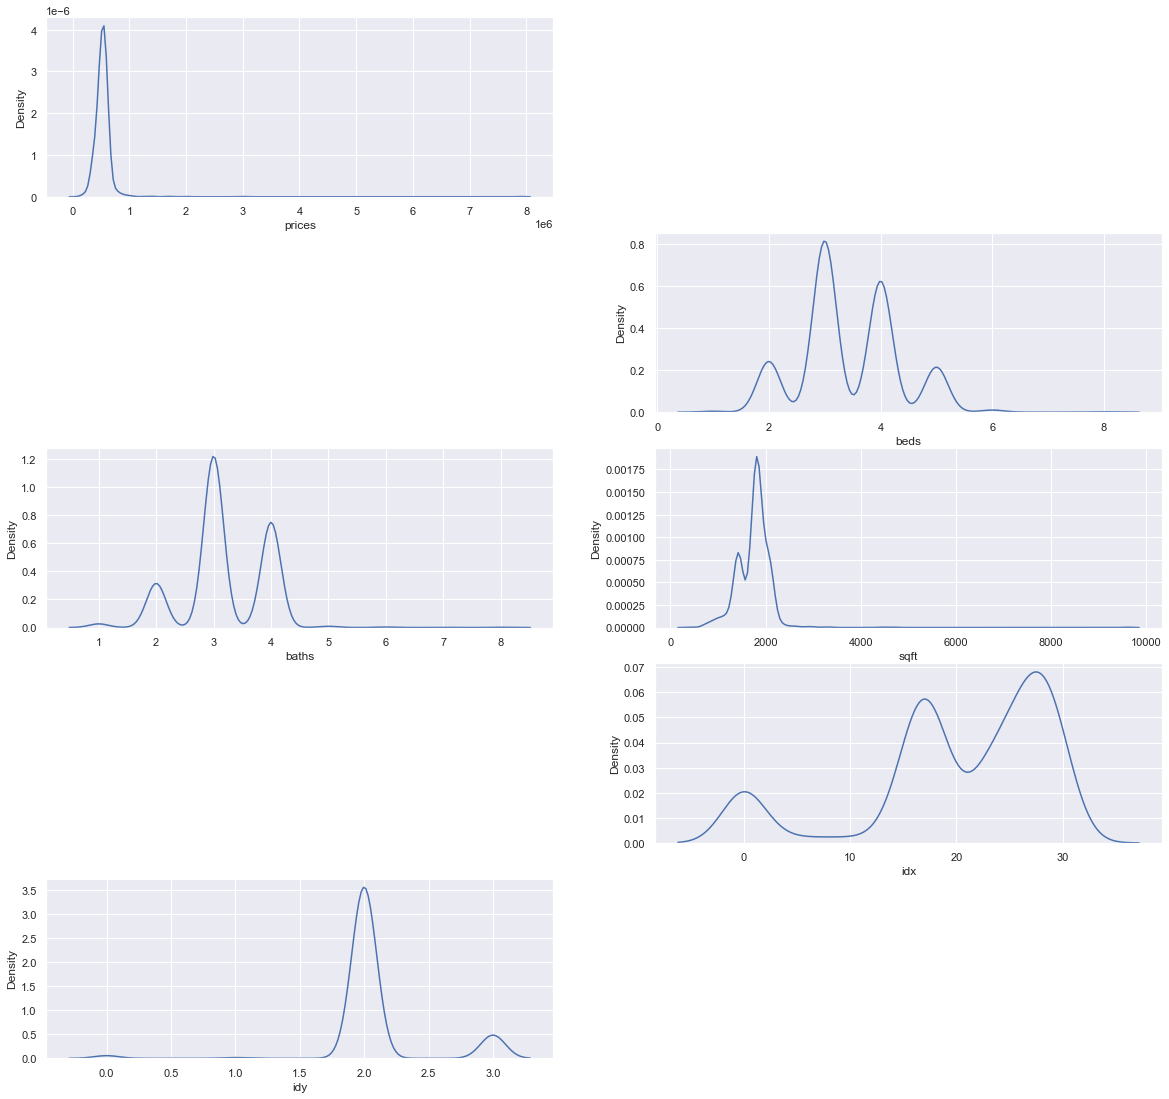

In [7]:
plt.figure(figsize=(20,35))
for i, col in enumerate(data_1.columns):
    if data_1[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(data_1[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

Since price data (target value for regression) is skewed we transform it using the logarithmic transformation.  

In [8]:
data_1['prices'] = np.log1p(data_1['prices'])


In [9]:
data_1.head()

,prices,address,zip code,beds,baths,sqft,type,idx,idy
0,15.88,44 S Aspen Ridge Hts SW Calgary AB T3H 0J8,T3H,6,8,9578,House,24,2
1,14.91,548 Willow Brook Dr S Calgary AB T2J 1N7,T2J,6,6,4688,House,6,2
2,14.51,18 S Spring Glen Vw SW Calgary AB T3H 6A1,T3H,6,6,4438,House,24,2
3,14.37,85 N Slopes Poin SW Calgary AB T3H 3Y8,T3H,4,3,2533,House,24,2
4,14.33,2027 N 49th Ave SW Calgary AB T2T 2V5,T2T,5,4,2631,House,14,2


In [10]:
# cols = ['prices','beds','baths','sqft','idx','idy']

In [11]:
# for col in cols:
#     data_1[col] = np.log(1 + data_1[col])

In [12]:
# plt.figure(figsize=(15,20))
# for i, col in enumerate(cols):
#     ax = plt.subplot(6, 2, i+1)
#     sns.kdeplot(data_1[col], ax=ax)
# plt.show()

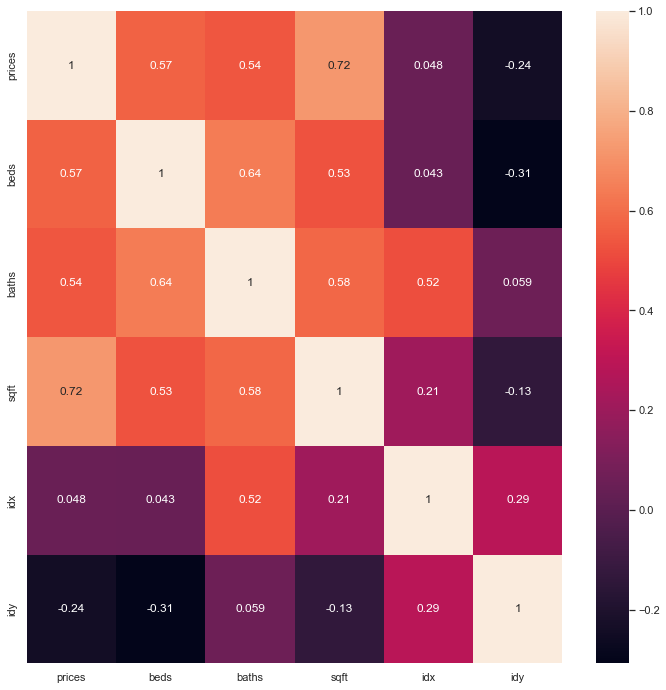

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(data_1.corr(), annot=True)
plt.show()

In [14]:
data_1.describe(include='all')

,prices,address,zip code,beds,baths,sqft,type,idx,idy
count,1347.00,1347,1347,1347.00,1347.00,1347.00,1347,1347.00,1347.00
unique,NaN,177,32,NaN,NaN,NaN,4,NaN,NaN
top,NaN,529 SW Schubert Pl NW Calgary AB T3L 1X3,T3N,NaN,NaN,NaN,House,NaN,NaN
freq,NaN,131,265,NaN,NaN,NaN,1166,NaN,NaN
mean,13.15,NaN,NaN,3.44,3.18,1754.90,NaN,20.26,2.09
std,0.23,NaN,NaN,0.88,0.73,386.97,NaN,8.71,0.41
min,11.61,NaN,NaN,1.00,1.00,433.00,NaN,0.00,0.00
25%,13.06,NaN,NaN,3.00,3.00,1470.00,NaN,17.00,2.00
50%,13.20,NaN,NaN,3.00,3.00,1821.00,NaN,23.00,2.00
75%,13.30,NaN,NaN,4.00,4.00,1873.00,NaN,27.00,2.00


Removing the outliers from the square foot data.

In [15]:
q = data_1['sqft'].quantile(0.01)
data = data_1[data_1['sqft']>q]
data.describe(include='all')

,prices,address,zip code,beds,baths,sqft,type,idx,idy
count,1333.00,1333,1333,1333.00,1333.00,1333.00,1333,1333.00,1333.00
unique,NaN,163,32,NaN,NaN,NaN,4,NaN,NaN
top,NaN,61 S Redstone Cir NE Calgary AB T3N 0M8,T3N,NaN,NaN,NaN,House,NaN,NaN
freq,NaN,131,264,NaN,NaN,NaN,1162,NaN,NaN
mean,13.16,NaN,NaN,3.45,3.20,1765.42,NaN,20.35,2.10
std,0.22,NaN,NaN,0.88,0.71,374.90,NaN,8.67,0.38
min,12.27,NaN,NaN,1.00,1.00,864.00,NaN,0.00,0.00
25%,13.06,NaN,NaN,3.00,3.00,1470.00,NaN,17.00,2.00
50%,13.20,NaN,NaN,3.00,3.00,1821.00,NaN,23.00,2.00
75%,13.30,NaN,NaN,4.00,4.00,1873.00,NaN,27.00,2.00


In [16]:
q = data_1['sqft'].quantile(0.99)
data = data_1[data_1['sqft']<q]
data.describe(include='all')

,prices,address,zip code,beds,baths,sqft,type,idx,idy
count,1333.00,1333,1333,1333.00,1333.00,1333.00,1333,1333.00,1333.00
unique,NaN,163,32,NaN,NaN,NaN,4,NaN,NaN
top,NaN,5 NE Inverness Vw SE Calgary AB T2Z 3P7,T3N,NaN,NaN,NaN,House,NaN,NaN
freq,NaN,131,264,NaN,NaN,NaN,1153,NaN,NaN
mean,13.14,NaN,NaN,3.42,3.17,1735.79,NaN,20.24,2.09
std,0.20,NaN,NaN,0.87,0.69,287.58,NaN,8.74,0.41
min,11.61,NaN,NaN,1.00,1.00,433.00,NaN,0.00,0.00
25%,13.06,NaN,NaN,3.00,3.00,1470.00,NaN,17.00,2.00
50%,13.20,NaN,NaN,3.00,3.00,1821.00,NaN,23.00,2.00
75%,13.22,NaN,NaN,4.00,4.00,1873.00,NaN,27.00,2.00


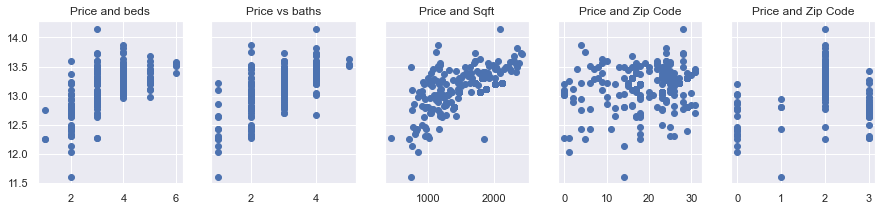

In [17]:
f, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1, 5, sharey=True, figsize =(15,3))
ax1.scatter(data['beds'],data['prices'])
ax1.set_title('Price and beds')
ax2.scatter(data['baths'],data['prices'])
ax2.set_title('Price vs baths')
ax3.scatter(data['sqft'],data['prices'])
ax3.set_title('Price and Sqft')
ax4.scatter(data['idx'],data['prices'])
ax4.set_title('Price and Zip Code')
ax5.scatter(data['idy'],data['prices'])
ax5.set_title('Price and Zip Code')
plt.show()

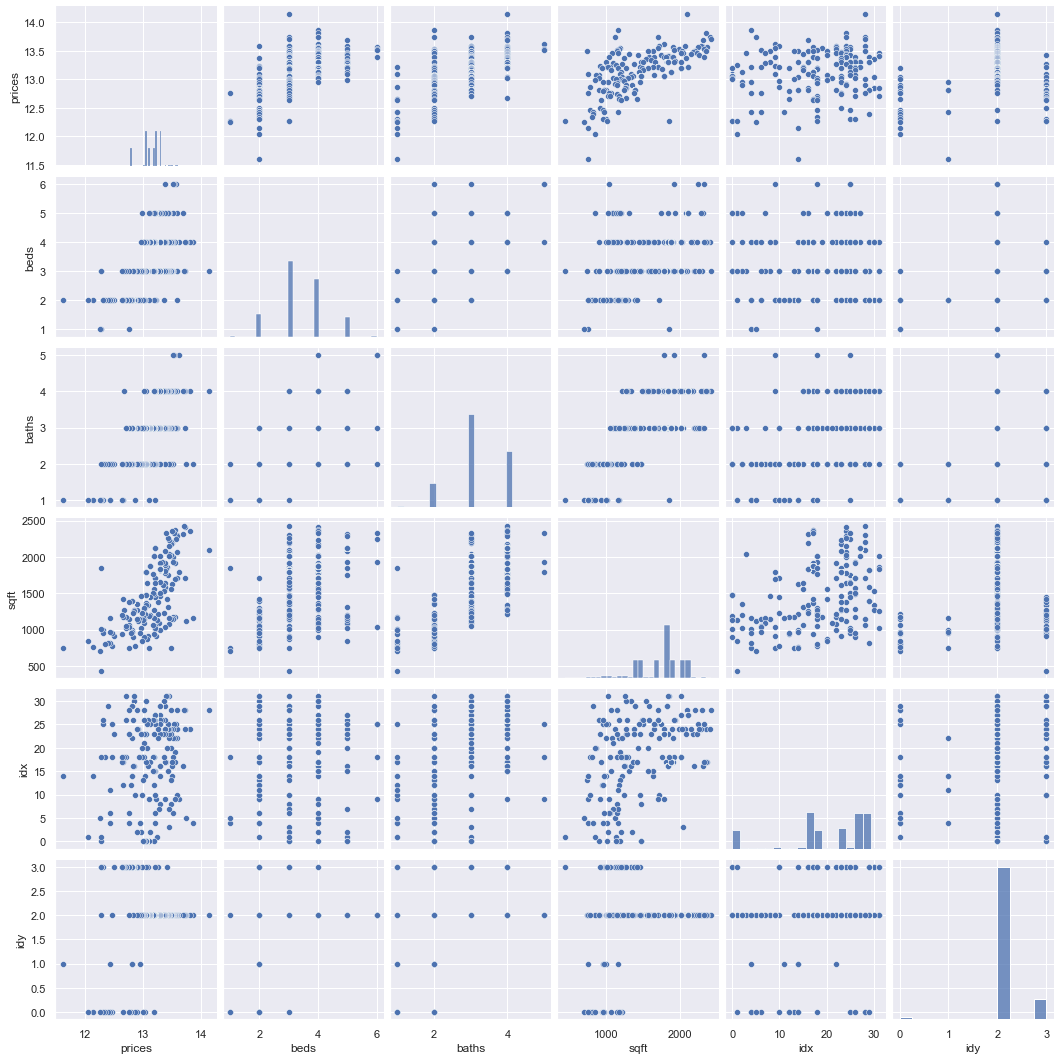

In [18]:
sns.pairplot(data)

### Linear Regression

In [19]:
X = data[['beds','baths','sqft','idx','idy']]
y = data['prices']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [22]:
# print the intercept
print(lin_reg.intercept_)

12.621656846300873


In [23]:
pd.DataFrame(lin_reg.coef_, X.columns, columns=['coef'])

,coef
beds,0.02
baths,0.09
sqft,0.00
idx,-0.00
idy,-0.10


In [24]:
pred = lin_reg.predict(X_test)

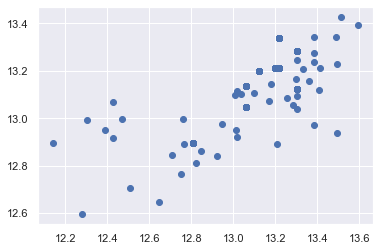

In [25]:
plt.scatter(y_test, pred)

In [26]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df

,Actual,Predicted
912,13.06,13.14
1076,13.06,13.14
1265,12.81,12.89
312,13.30,13.28
251,13.30,13.28
...,...,...
875,13.12,13.20
722,13.20,13.21
675,13.20,13.21
1113,13.06,13.05


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prices', ylabel='Density'>

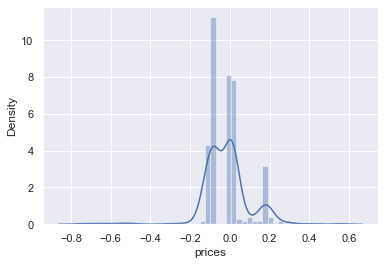

In [27]:
sns.distplot((y_test-pred), bins=50)

Visualizing the comparison of actual and predicted values.

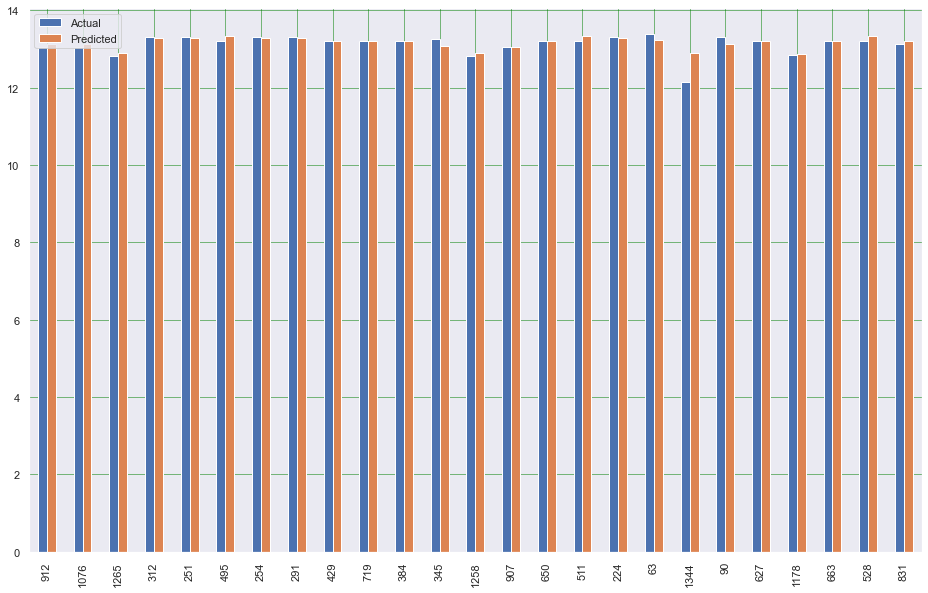

In [28]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='2.0', color='black')
plt.show()

Defining function to calculate errors of regressions.

In [29]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    mape = mape_score(true, predicted)
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('MAPE:', mape)
    print('R2 Square', r2_square)
    print('__________________________________')


def mape_score(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100


def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    mape = mape_score(true, predicted)
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, mape, r2_square

In [30]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score


test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)


print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
# print('MAE:', metrics.mean_absolute_error(y_test,pred))
# print('MSE:', metrics.mean_squared_error(y_test,pred))
# print('RSME:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

Test set evaluation:
_____________________________________
MAE: 0.07989193637314651
MSE: 0.015457007290829262
RMSE: 0.12432621320875684
MAPE: 0.6120269616307499
R2 Square 0.585763162015593
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.09044769071507792
MSE: 0.021263223908512558
RMSE: 0.14581914794879497
MAPE: 0.6881913872418111
R2 Square 0.46678226076614404
__________________________________


In [31]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2 Square'])
results_df

,Model,MAE,MSE,RMSE,MAPE,R2 Square
0,Linear Regression,0.08,0.02,0.12,0.61,0.59


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


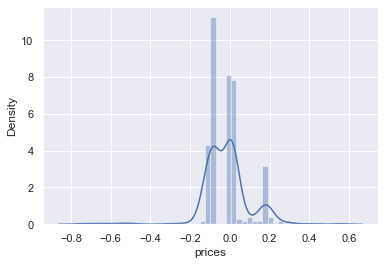

In [32]:
sns.distplot((y_test - pred), bins=50);

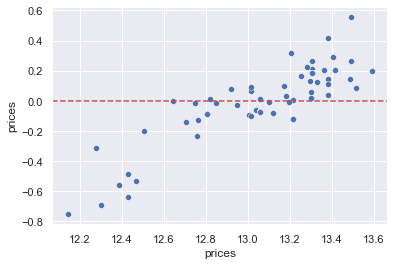

In [33]:
sns.scatterplot(x=y_test, y=y_test-pred)
plt.axhline(y=0, color='r', ls='--')

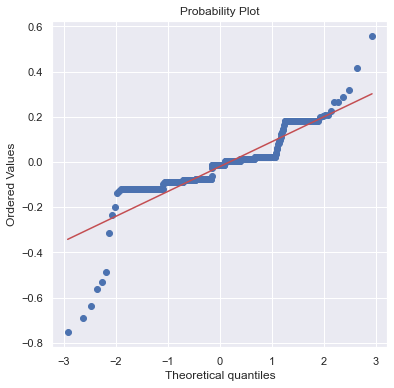

In [34]:
import scipy as sp
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,6))
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(y_test-pred,plot=ax)

### Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=30)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.016342740958036756
MSE: 0.004667687643728733
RMSE: 0.06832047748463657
MAPE: 0.12820662084402576
R2 Square 0.8749092800529212
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.008900523652318141
MSE: 0.0013664738481820287
RMSE: 0.03696584705078498
MAPE: 0.06801599782691517
R2 Square 0.9657329434527514
__________________________________


In [36]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,MAPE,R2 Square
0,Linear Regression,0.08,0.02,0.12,0.61,0.59
1,Random Forest Regressor,0.02,0.00,0.07,0.13,0.87


### Lasso Regression

In [37]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.11285517197829138
MSE: 0.01867246663003926
RMSE: 0.13664723425682374
MAPE: 0.8630450344454803
R2 Square 0.4995911311508575
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.11953512352260465
MSE: 0.025718164703013562
RMSE: 0.1603688395637181
MAPE: 0.9106208678252476
R2 Square 0.3550657370120246
__________________________________


In [38]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,MAPE,R2 Square
0,Linear Regression,0.08,0.02,0.12,0.61,0.59
1,Random Forest Regressor,0.02,0.00,0.07,0.13,0.87
2,Lasso Regression,0.11,0.02,0.14,0.86,0.50


### Predictor Function

In [39]:
pickle.dump(lin_reg, open('model.pkl','wb'))

In [41]:
model = pickle.load(open('model.pkl','rb'))
print(np.exp(model.predict([[3,2,1810,2,3]])).round(decimals=2))

[456409.]
